In [1]:
!pip install BorutaShap

     |################################| 326 kB 1.4 MB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-macosx_10_9_x86_64.whl size=379043 sha256=6ccda6bb3ad943f522ac3ea34e8248c9adf5f3cc73b5b58f66b7ded21871e355
  Stored in directory: /Users/nezmi/Library/Caches/pip/wheels/9f/f0/81/55d1fce3ccceacb520abc45e88f3d2de2959cd079f712b5f85
Successfully built shap
  Attempting uninstall: shap
    Found existing installation: shap 0.32.1
    Uninstalling shap-0.32.1:
      Successfully uninstalled shap-0.32.1


In [2]:
from BorutaShap import BorutaShap, load_data
from xgboost import XGBClassifier

X, y = load_data(data_type='classification')
X.head()

model = XGBClassifier()

# if classification is False it is a Regression problem
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=y, n_trials=100, sample=False,
                     train_or_test = 'test', normalize=True,
                     verbose=True)

100%|██████████| 100/100 [00:20<00:00,  4.88it/s]

11 attributes confirmed important: ['worst texture', 'worst radius', 'worst perimeter', 'mean concave points', 'area error', 'worst area', 'worst concave points', 'mean texture', 'compactness error', 'worst concavity', 'worst smoothness']
19 attributes confirmed unimportant: ['smoothness error', 'radius error', 'mean radius', 'mean concavity', 'texture error', 'mean perimeter', 'concave points error', 'symmetry error', 'concavity error', 'worst fractal dimension', 'fractal dimension error', 'mean symmetry', 'perimeter error', 'mean area', 'mean compactness', 'mean fractal dimension', 'worst compactness', 'worst symmetry', 'mean smoothness']
0 tentative attributes remains: []


100%|██████████| 100/100 [06:35<00:00,  3.96s/it]


10 attributes confirmed important: ['PTRATIO', 'B', 'INDUS', 'LSTAT', 'TAX', 'NOX', 'DIS', 'AGE', 'CRIM', 'RM']
3 attributes confirmed unimportant: ['ZN', 'CHAS', 'RAD']
0 tentative attributes remains: []


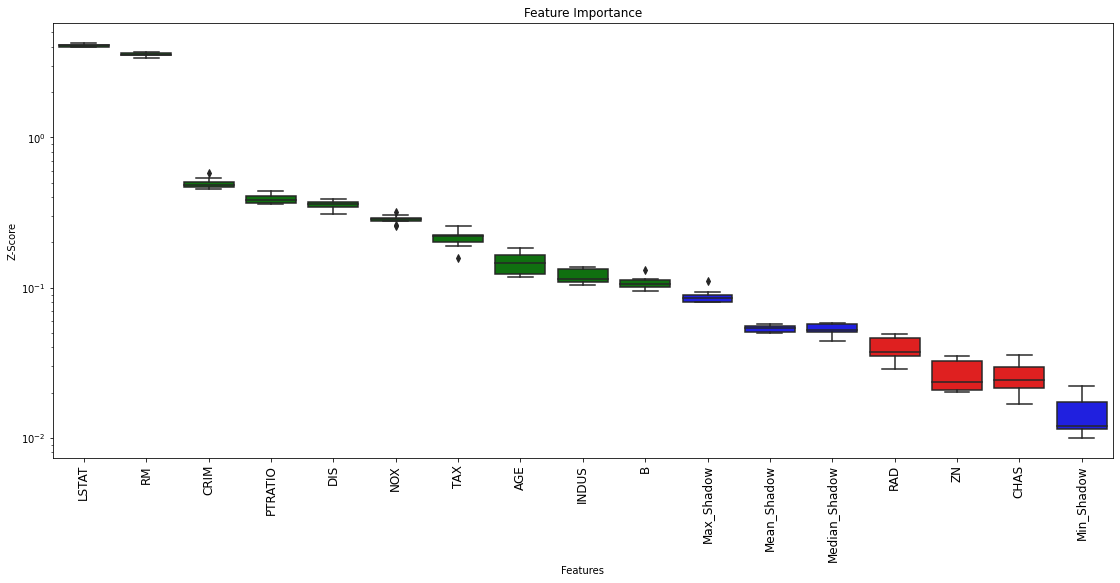

In [3]:
X, y = load_data(data_type='regression')
X.head()
Feature_Selector = BorutaShap(importance_measure='shap',
                              classification=False)

Feature_Selector.fit(X=X, y=y, n_trials=100, random_state=0)
Feature_Selector.plot(X_size=12, figsize=(19,8),
                      y_scale='log', which_features='all',)

In [4]:
if self.importance_measure == 'shap':

    self.explain()
    vals = self.shap_values

if normalize:
    vals = self.calculate_Zscore(vals)

    X_feature_import = vals[:len(self.X.columns)]
    Shadow_feature_import = vals[len(self.X_shadow.columns):]


elif self.importance_measure == 'gini':

    feature_importances_ =  np.abs(self.model.feature_importances_)

if normalize:
    feature_importances_ = self.calculate_Zscore(feature_importances_)

    X_feature_import = feature_importances_[:len(self.X.columns)]
    Shadow_feature_import = feature_importances_[len(self.X.columns):]

else:

    raise ValueError('No Importance_measure was specified select one of (shap, gini)')

IndentationError: expected an indented block (<ipython-input-4-22f7e5d1aeb6>, line 3)